In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
df_train = pd.read_csv("train_processed.csv")
df_test = pd.read_csv("test_processed.csv")

In [3]:
for df in [df_train, df_test]:
    cnt = 0
    for s in df["soldout"]:
        if s == 1:
            cnt += 1
    print(cnt / len(df))

0.4629080118694362
0.3125


In [4]:
df_train_dict = {}
for name, group in df_train.groupby("soldout"):
    df_train_dict[name] = group

df_test_dict = {}
for name, group in df_test.groupby("soldout"):
    df_test_dict[name] = group
print(df_train_dict.keys(), df_test_dict.keys())

dict_keys([0, 1]) dict_keys([0, 1])


## soldoutしていないものの予測

In [43]:
exp_0 = setup(df_train_dict[0].drop(["dateid"], axis=1), target="y", session_id=103, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,103
1,Target,y
2,Original Data,"(181, 42)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,38
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(126, 170)"


In [44]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,13.4817,308.8213,16.6958,0.4101,0.2639,0.2301,0.0070
lasso,Lasso Regression,11.9934,260.1210,15.4666,0.4061,0.2338,0.1983,0.0050
ada,AdaBoost Regressor,10.5184,220.2336,13.8286,0.4053,0.2127,0.1747,0.0160
ridge,Ridge Regression,13.4093,317.6780,16.9355,0.3763,0.2692,0.2297,0.0050
rf,Random Forest Regressor,11.2097,253.0183,14.9980,0.3412,0.2302,0.1828,0.1440
omp,Orthogonal Matching Pursuit,10.9324,253.6625,14.7859,0.3394,0.2239,0.1757,0.0070
gbr,Gradient Boosting Regressor,11.5580,263.2970,15.3618,0.3296,0.2367,0.1908,0.0150
llar,Lasso Least Angle Regression,14.0635,358.9001,18.4314,0.3124,0.2588,0.2221,0.0060
xgboost,Extreme Gradient Boosting,11.3237,257.9023,15.2862,0.3086,0.2401,0.1959,0.0540
en,Elastic Net,14.6639,381.0425,18.8100,0.2993,0.2659,0.2343,0.0060


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [45]:
model_0 = create_model("ada")
tuned_model_0 = tune_model(model_0, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.7274,282.4438,16.8061,0.5916,0.3366,0.3194
1,9.1678,112.0407,10.5849,0.7694,0.1661,0.1468
2,5.8296,46.3812,6.8104,0.9212,0.1194,0.1013
3,7.3824,70.7805,8.4131,0.7800,0.1577,0.1430
4,11.7490,187.7011,13.7004,0.7404,0.2128,0.1845
5,14.9066,514.3157,22.6785,-2.2052,0.2576,0.2034
6,5.3537,54.7866,7.4018,0.8344,0.1206,0.0855
7,15.4760,507.7572,22.5335,0.3455,0.2952,0.1913
8,8.6946,97.1090,9.8544,0.7847,0.1744,0.1587


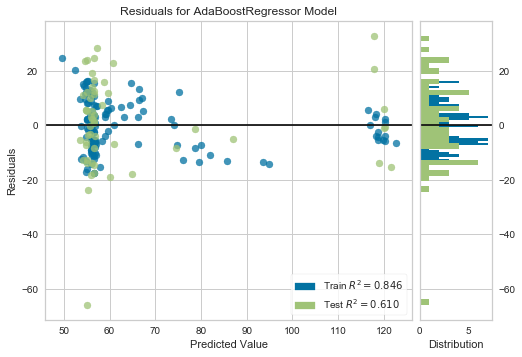

In [46]:
plot_model(tuned_model_0)

## soldoutしたものの予測

In [57]:
exp_1 = setup(df_train_dict[1].drop(["dateid", "name", "weather"], axis=1), target="y", session_id=13, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,13
1,Target,y
2,Original Data,"(156, 40)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,36
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(109, 49)"


In [58]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,12.0662,272.6041,15.3061,-0.1090,0.2307,0.1961,0.0050
dummy,Dummy Regressor,12.0662,272.6040,15.3061,-0.1090,0.2307,0.1961,0.0050
rf,Random Forest Regressor,11.6941,231.0833,14.4511,-0.1098,0.2156,0.1890,0.1410
ada,AdaBoost Regressor,11.6890,255.6451,15.0293,-0.1256,0.2243,0.1871,0.0160
knn,K Neighbors Regressor,11.7467,253.7549,15.0109,-0.1374,0.2247,0.1907,0.0250
lightgbm,Light Gradient Boosting Machine,12.3006,290.4258,15.6873,-0.2015,0.2365,0.2025,0.0070
gbr,Gradient Boosting Regressor,12.4445,253.7642,15.2040,-0.2709,0.2293,0.2029,0.0120
br,Bayesian Ridge,12.5397,289.6437,15.9971,-0.2795,0.2395,0.2040,0.0050
xgboost,Extreme Gradient Boosting,12.6594,277.3012,15.9731,-0.3486,0.2412,0.2038,0.0350
en,Elastic Net,12.5437,291.6761,16.0711,-0.3769,0.2396,0.2055,0.0050


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=13, verbose=False)

In [59]:
model_1 = create_model("rf")
tuned_model_1 = tune_model(model_1, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.2018,102.7623,10.1372,-0.3015,0.1584,0.1531
1,17.3104,403.8269,20.0954,-0.0292,0.2800,0.2428
2,11.7592,234.8105,15.3235,-0.0848,0.2699,0.2284
3,6.7553,58.9711,7.6793,0.1749,0.1137,0.1025
4,10.4244,174.9714,13.2277,-0.0980,0.2307,0.2006
5,18.6716,835.6002,28.9067,-0.0575,0.3720,0.2621
6,11.3979,187.0451,13.6764,-0.1985,0.2111,0.1865
7,6.8454,70.0167,8.3676,-0.0757,0.1338,0.1170
8,10.7842,185.1771,13.6080,-0.0431,0.1876,0.1618


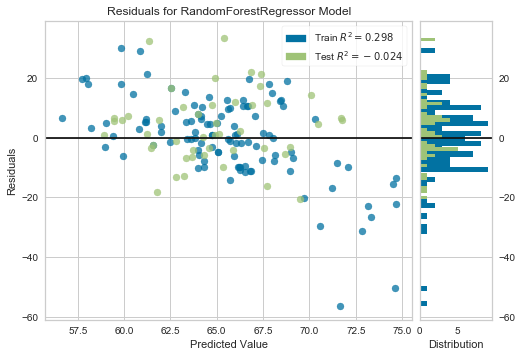

In [60]:
plot_model(tuned_model_1)

## soldoutしたものの予測（年月日追加）

In [283]:
dates = df_train_dict[1]["dateid"].values
df_train_soldout_1 = df_train_dict[1].drop(["dateid", "name", "weather"], axis=1)

In [284]:
year = []
month = []
day = []
for d in dates:
    year.append(int(d[:4]))
    month.append(int(d[5:7]))
    day.append(int(d[8:]))
df_train_soldout_1["year"] = year
df_train_soldout_1["month"] = month
df_train_soldout_1["day"] = day
df_train_soldout_1.head()

,y,week,soldout,kcal,remarks,event,payday,precipitation,temperature,main_曇,...,ingredient_other,cook_yaki,cook_ni,cook_age,cook_itame,cook_curry,cook_other,year,month,day
0,125.0,Tue,1,377.0,NaN,NaN,NaN,0.0,13.9,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2014,4,1
2,100.0,Thu,1,390.0,NaN,NaN,NaN,65.0,13.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2014,4,3
3,90.0,Fri,1,350.0,NaN,NaN,NaN,40.0,15.3,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2014,4,4
5,96.0,Tue,1,353.0,NaN,NaN,NaN,0.0,15.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2014,4,8
6,88.0,Wed,1,376.0,NaN,NaN,NaN,0.0,15.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2014,4,9


In [285]:
exp_2 = setup(df_train_soldout_1, target="y", session_id=3918, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,3918
1,Target,y
2,Original Data,"(156, 43)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,38
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(109, 63)"


In [286]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.6516,158.3570,12.2965,0.1026,0.1831,0.1513,0.0120
rf,Random Forest Regressor,9.4907,164.9865,12.5954,0.0933,0.1866,0.1505,0.1450
ada,AdaBoost Regressor,10.2465,177.0195,13.0213,0.0408,0.1923,0.1602,0.0150
ridge,Ridge Regression,10.2713,172.9858,12.8011,0.0399,0.1920,0.1646,0.0050
huber,Huber Regressor,10.5814,218.9598,14.0388,-0.0672,0.2051,0.1668,0.0070
dummy,Dummy Regressor,10.9156,210.7192,14.0235,-0.0728,0.2106,0.1756,0.0050
llar,Lasso Least Angle Regression,10.9156,210.7192,14.0235,-0.0728,0.2106,0.1756,0.0060
lasso,Lasso Regression,10.7987,212.4749,14.0204,-0.0812,0.2093,0.1750,0.0050
en,Elastic Net,11.0650,223.6675,14.3229,-0.1188,0.2126,0.1792,0.0050
br,Bayesian Ridge,11.1640,224.4618,14.3868,-0.1199,0.2149,0.1802,0.0050


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3918, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [290]:
model_train_soldout_1 = create_model("rf")
tuned_model_train_soldout_1 = tune_model(model_train_soldout_1, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.0554,125.3749,11.1971,0.0770,0.1517,0.1169
1,12.0569,212.4583,14.5759,-0.2523,0.2037,0.1620
2,11.5191,360.2478,18.9802,0.2582,0.2060,0.1326
3,7.8784,132.6064,11.5155,0.2445,0.1779,0.1363
4,7.1771,96.1401,9.8051,-0.2460,0.1578,0.1216
5,10.6752,202.7756,14.2399,0.3260,0.2114,0.1723
6,9.5766,158.3762,12.5848,0.2547,0.2246,0.1886
7,7.1681,85.9851,9.2728,0.2364,0.1465,0.1176
8,9.9824,140.5328,11.8547,0.1137,0.1964,0.1673


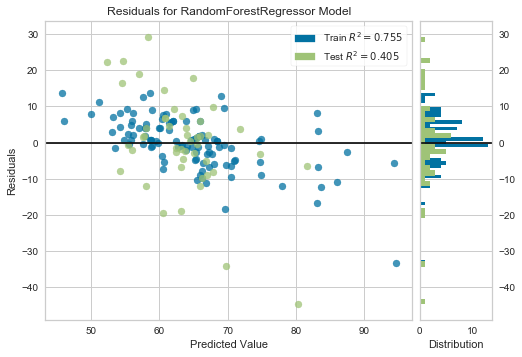

In [291]:
plot_model(tuned_model_train_soldout_1)

In [292]:
dates = df_test_dict[1]["dateid"].values
df_test_soldout_1 = df_test_dict[1].drop(["dateid", "name", "weather"], axis=1)

In [293]:
year = []
month = []
day = []
for d in dates:
    year.append(int(d[:4]))
    month.append(int(d[5:7]))
    day.append(int(d[8:]))
df_test_soldout_1["year"] = year
df_test_soldout_1["month"] = month
df_test_soldout_1["day"] = day
df_test_soldout_1.head()

,week,soldout,kcal,remarks,event,payday,precipitation,temperature,main_曇,main_大雨,...,ingredient_other,cook_yaki,cook_ni,cook_age,cook_itame,cook_curry,cook_other,year,month,day
3,Thu,1,439.0,NaN,NaN,1.0,50.0,21.8,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2015,9,10
8,Thu,1,468.0,NaN,NaN,NaN,74.5,17.9,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2015,9,17
12,Mon,1,456.0,NaN,NaN,NaN,0.0,23.3,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2015,9,28
14,Wed,1,438.0,NaN,NaN,NaN,0.0,20.9,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2015,9,30
15,Mon,1,425.0,NaN,NaN,NaN,38.0,12.7,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2015,11,2


In [294]:
final_model_train_soldout_1 = finalize_model(tuned_model_train_soldout_1)
df_pred_soldout_1 = predict_model(final_model_train_soldout_1, data=df_test_soldout_1)
df_submit_soldout_1 = pd.concat([df_test_dict[1]["dateid"], df_pred_soldout_1["Label"]], axis=1)

## soldoutしなかったものの予測（年月日追加）

In [295]:
dates = df_train_dict[0]["dateid"].values
df_train_soldout_0 = df_train_dict[0].drop(["dateid", "name", "weather"], axis=1)

In [296]:
year = []
month = []
day = []
for d in dates:
    year.append(int(d[:4]))
    month.append(int(d[5:7]))
    day.append(int(d[8:]))
df_train_soldout_0["year"] = year
df_train_soldout_0["month"] = month
df_train_soldout_0["day"] = day
df_train_soldout_0.head()

,y,week,soldout,kcal,remarks,event,payday,precipitation,temperature,main_曇,...,ingredient_other,cook_yaki,cook_ni,cook_age,cook_itame,cook_curry,cook_other,year,month,day
1,99.0,Wed,0,380.0,NaN,NaN,NaN,0.0,15.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2014,4,2
4,107.0,Mon,0,387.0,NaN,NaN,NaN,0.0,11.4,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2014,4,7
7,87.0,Thu,0,362.0,NaN,NaN,1.0,0.0,16.1,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2014,4,10
9,92.0,Mon,0,340.0,NaN,NaN,NaN,0.0,14.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2014,4,14
10,82.0,Tue,0,370.0,NaN,NaN,NaN,0.0,16.3,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2014,4,15


In [297]:
exp_3 = setup(df_train_soldout_0, target="y", session_id=124, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,124
1,Target,y
2,Original Data,"(181, 43)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,38
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(126, 61)"


In [298]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.2988,184.1287,12.4882,0.6281,0.1884,0.1520,0.0120
rf,Random Forest Regressor,9.0826,168.5948,12.2540,0.6268,0.1904,0.1534,0.1410
xgboost,Extreme Gradient Boosting,9.1376,164.1960,12.2856,0.6199,0.1866,0.1515,0.0350
ada,AdaBoost Regressor,10.0861,201.6834,13.5394,0.5645,0.2098,0.1716,0.0150
br,Bayesian Ridge,10.3651,186.2063,13.0200,0.5515,0.2011,0.1733,0.0050
ridge,Ridge Regression,10.2539,182.9707,12.9802,0.5406,0.1988,0.1692,0.0050
omp,Orthogonal Matching Pursuit,11.5488,225.3440,14.3365,0.4649,0.2271,0.1964,0.0100
lasso,Lasso Regression,11.8752,233.7492,14.7150,0.4339,0.2388,0.2096,0.0050
huber,Huber Regressor,11.7811,245.1566,14.9011,0.4138,0.2352,0.1977,0.0080
lr,Linear Regression,11.6483,226.4406,14.7137,0.3780,0.2287,0.1904,0.0120


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=124, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [299]:
model_train_soldout_0 = create_model("rf")
tuned_model_train_soldout_0 = tune_model(model_train_soldout_0, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.9810,124.5306,11.1593,0.7230,0.1439,0.1240
1,13.2931,285.0484,16.8834,0.6974,0.2211,0.1751
2,8.3641,118.1251,10.8685,0.3228,0.2276,0.1849
3,5.2683,43.7076,6.6112,0.5711,0.1180,0.0921
4,6.9904,118.1791,10.8710,0.7965,0.1765,0.1259
5,15.7304,492.1913,22.1854,0.4016,0.3203,0.2570
6,11.1814,167.5690,12.9448,0.5109,0.2075,0.2001
7,6.0019,68.5406,8.2789,0.5942,0.1328,0.1068
8,9.1848,117.6163,10.8451,0.8652,0.1786,0.1613


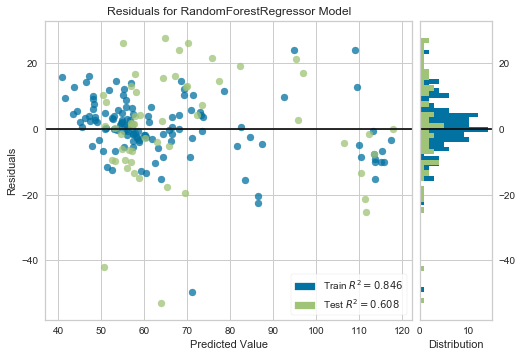

In [300]:
plot_model(tuned_model_train_soldout_0)

In [301]:
dates = df_test_dict[0]["dateid"].values
df_test_soldout_0 = df_test_dict[0].drop(["dateid", "name", "weather"], axis=1)

In [302]:
year = []
month = []
day = []
for d in dates:
    year.append(int(d[:4]))
    month.append(int(d[5:7]))
    day.append(int(d[8:]))
df_test_soldout_0["year"] = year
df_test_soldout_0["month"] = month
df_test_soldout_0["day"] = day
df_test_soldout_0.head()

,week,soldout,kcal,remarks,event,payday,precipitation,temperature,main_曇,main_大雨,...,ingredient_other,cook_yaki,cook_ni,cook_age,cook_itame,cook_curry,cook_other,year,month,day
0,Mon,0,428.0,NaN,NaN,NaN,19.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2015,9,7
1,Tue,0,420.0,NaN,NaN,NaN,65.5,20.0,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2015,9,8
2,Wed,0,456.0,NaN,NaN,NaN,156.5,22.4,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2015,9,9
4,Fri,0,NaN,お楽しみメニュー,NaN,NaN,0.0,23.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2015,9,11
5,Mon,0,437.0,NaN,NaN,NaN,0.0,22.9,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2015,9,14


In [303]:
final_model_train_soldout_0 = finalize_model(tuned_model_train_soldout_0)
df_pred_soldout_0 = predict_model(final_model_train_soldout_0, data=df_test_soldout_0)
df_submit_soldout_0 = pd.concat([df_test_dict[0]["dateid"], df_pred_soldout_0["Label"]], axis=1)

In [304]:
df_submit = pd.concat([df_submit_soldout_0, df_submit_soldout_1], axis=0)
df_submit = df_submit.sort_values("dateid")
df_submit.head()

,dateid,Label
0,2015-09-07,61.656300
1,2015-09-08,61.730270
2,2015-09-09,62.386450
3,2015-09-10,67.200148
4,2015-09-11,112.680698


In [306]:
df_submit.to_csv("submit.csv", index=False, header=False)

In [307]:
print(df_submit.shape)
df_submit_sapmle = pd.read_csv("無加工/submit_sample.csv", header=None)
print(df_submit_sapmle.shape)

(144, 2)
(144, 2)
